<a href="https://colab.research.google.com/github/sebfre98/Analisis-y-prediccion-de-ventas-empresa-europea-en-python-/blob/main/analisis_1000_ventas_1_2_ing_negocios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd


from google.colab import drive
drive.mount('/content/drive')

archivo_excel = '/content/drive/My Drive/1000-Registros-de-ventas.xls'
df = pd.read_excel(archivo_excel)


print(df)

#para agrupar por regiones
df_regiones = df.groupby('Zona')['Importe venta total'].sum()

print("Analisis por regiones")
print(df_regiones)


Mounted at /content/drive
    ID Cliente                    Zona              País   Tipo de producto  \
0        C2421                  Europa    United Kingdom             Snacks   
1        C1908                  Europa             Malta           Cárnicos   
2        C7652     Australia y Oceanía  Marshall Islands           Cereales   
3        C2326                  África              Iran             Frutas   
4        C5305  Centroamérica y Caribe         Guatemala  Alimento infantil   
..         ...                     ...               ...                ...   
995      C1627                  África            Malawi             Bebida   
996      C4408                    Asia             India   Cuidado personal   
997      C2808                    Asia        Tajikistan             Frutas   
998      C8608                  Europa           Finland           Verduras   
999      C2793                  África            Rwanda               Ropa   

    Canal de venta Priori

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


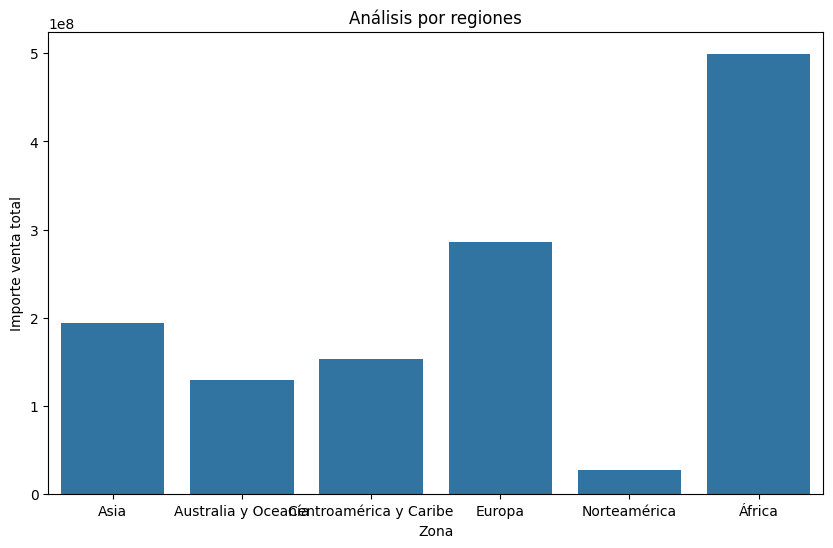

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

from google.colab import drive
drive.mount('/content/drive')

archivo_excel = '/content/drive/My Drive/1000-Registros-de-ventas.xls'
df = pd.read_excel(archivo_excel)

#para agrupar por regiones
df_regiones = df.groupby('Zona')['Importe venta total'].sum().reset_index()

# Crear el gráfico
plt.figure(figsize=(10,6))
sns.barplot(x='Zona', y='Importe venta total', data=df_regiones)
plt.title('Análisis por regiones')
plt.show()

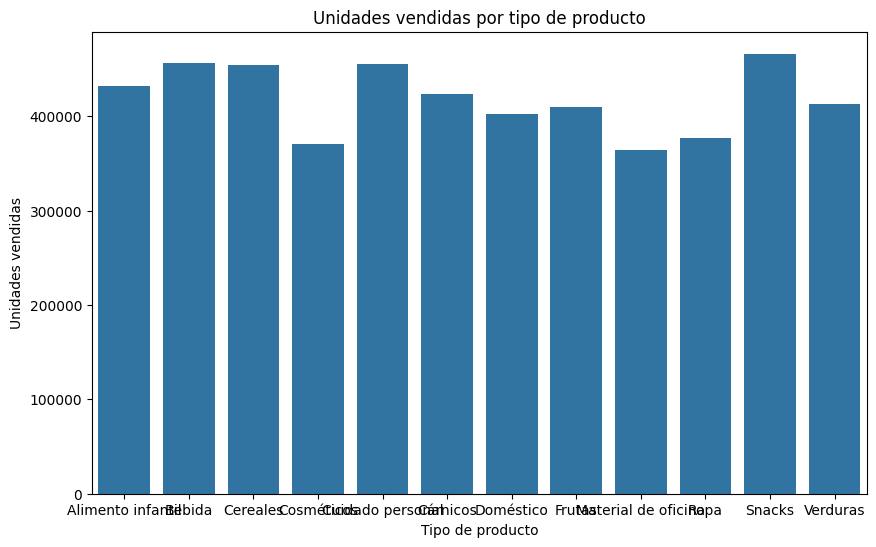

In [3]:
#Usando seaborn
# Primero, agrupamos los datos por 'Tipo de producto' y sumamos las 'Unidades'
grouped = df.groupby('Tipo de producto')['Unidades'].sum().reset_index()

# Luego, creamos el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='Tipo de producto', y='Unidades', data=grouped)
plt.title('Unidades vendidas por tipo de producto')
plt.xlabel('Tipo de producto')
plt.ylabel('Unidades vendidas')
plt.show()





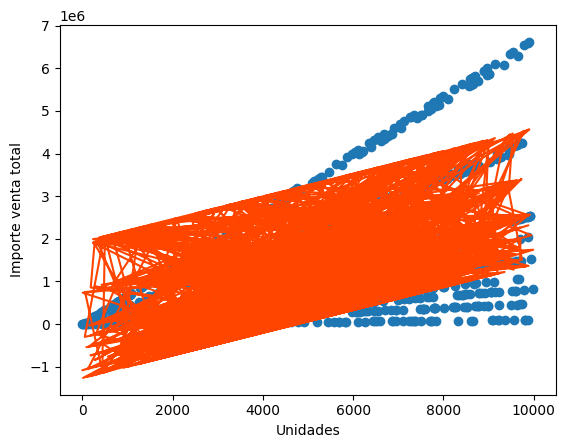

In [4]:
#Prediccion ventas con matplotlib
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Lee los datos de Excel
ruta_excel = "/content/drive/My Drive/1000-Registros-de-ventas.xls"
df = pd.read_excel(ruta_excel)

# Selecciona las variables independientes
X = df[["Unidades", "Precio Unitario"]]
y = df["Importe venta total"]

# Entrena el modelo
model = LinearRegression()
model.fit(X, y)

# Predice el importe venta total para nuevos datos
predictions = model.predict(X)

# Visualiza el modelo
import matplotlib.pyplot as plt
plt.scatter(X["Unidades"], y)
plt.plot(X["Unidades"], model.predict(X), color="orangered")
plt.xlabel("Unidades")
plt.ylabel("Importe venta total")
plt.show()


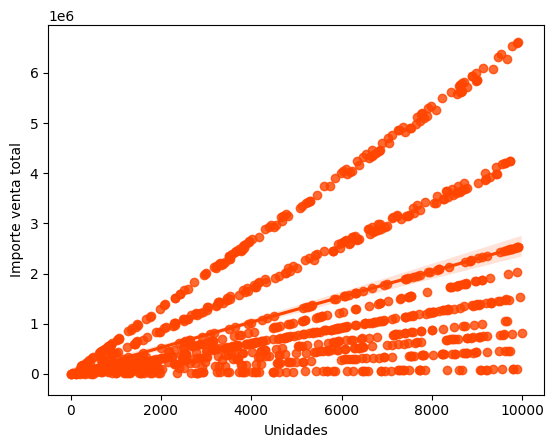

R^2: 0.8074805123066405
MSE: 383063502371.302


In [5]:
# Prediccion ventas total con seaborn
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

# Lee los datos de Excel
with pd.ExcelFile("/content/drive/My Drive/1000-Registros-de-ventas.xls") as excel:
    df = pd.read_excel(excel)

# Selecciona las variables independientes
features = df[["Unidades", "Precio Unitario"]]
target = df["Importe venta total"]

# Entrena el modelo
model = LinearRegression()
model.fit(features, target)

# Predice el importe venta total para nuevos datos
predictions = model.predict(features)

# Visualiza el modelo
sns.regplot(x="Unidades", y="Importe venta total", data=df, color="orangered")
plt.xlabel("Unidades")
plt.ylabel("Importe venta total")
plt.show()

# Evalúa el rendimiento del modelo
r2 = r2_score(target, predictions)
mse = mean_squared_error(target, predictions)
print(f"R^2: {r2}")
print(f"MSE: {mse}")


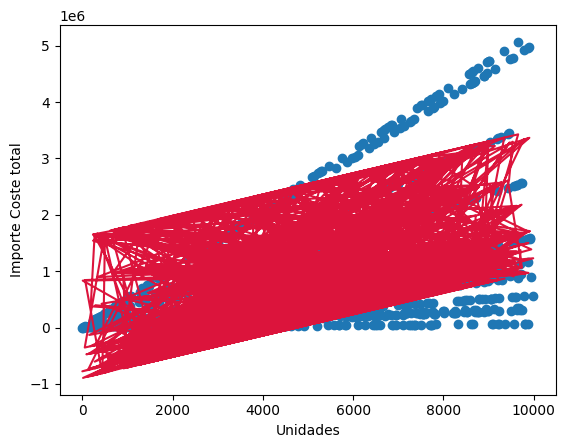

In [6]:
#Prediccion importe coste total con matplotlib
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Lee los datos de Excel
ruta_excel = "/content/drive/My Drive/1000-Registros-de-ventas.xls"
df = pd.read_excel(ruta_excel)

# Selecciona las variables independientes
X = df[["Unidades", "Coste unitario"]]
y = df["Importe Coste total"]

# Entrena el modelo
model = LinearRegression()
model.fit(X, y)

# Predice el importe venta total para nuevos datos
predictions = model.predict(X)

# Visualiza el modelo
import matplotlib.pyplot as plt
plt.scatter(X["Unidades"], y)
plt.plot(X["Unidades"], model.predict(X), color="crimson")
plt.xlabel("Unidades")
plt.ylabel("Importe Coste total")
plt.show()

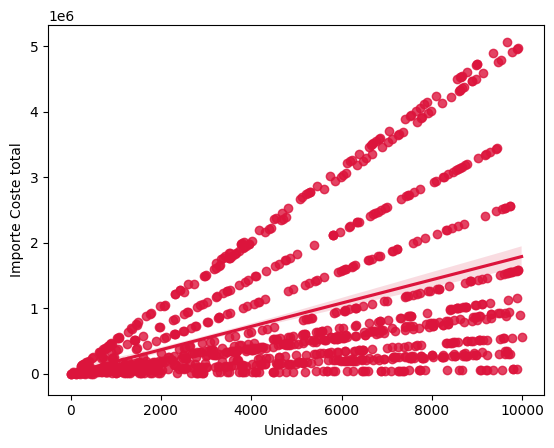

R^2: 0.7940970486772316
MSE: 250168534730.11984


In [7]:
# Prediccion coste total con seaborn
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

# Lee los datos de Excel
with pd.ExcelFile("/content/drive/My Drive/1000-Registros-de-ventas.xls") as excel:
    df = pd.read_excel(excel)

# Selecciona las variables independientes
features = df[["Unidades", "Coste unitario"]]
target = df["Importe Coste total"]

# Entrena el modelo
model = LinearRegression()
model.fit(features, target)

# Predice el importe venta total para nuevos datos
predictions = model.predict(features)

# Visualiza el modelo
sns.regplot(x="Unidades", y="Importe Coste total", data=df, color="crimson")
plt.xlabel("Unidades")
plt.ylabel("Importe Coste total")
plt.show()

# Evalúa el rendimiento del modelo
r2 = r2_score(target, predictions)
mse = mean_squared_error(target, predictions)
print(f"R^2: {r2}")
print(f"MSE: {mse}")